<a href="https://colab.research.google.com/github/EyeofaThous/AAE590/blob/main/AAE590Lecture13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
microstructure = np.array([[1,0,1],
                          [0,1,0],
                          [1,0,1]])

In [16]:
count = 0
total_pairs = 0
for i in range(height):
  for j in range(width):
    if microstructure[i,j] !=1:
      continue

  i2 = (i+delti)
  j2 = (j+deltaj)
  if microstucture[i2,j2] == 1:
    count += 1
  total_pairs +=1

S2 = count/(total_pairs+1e-12)

NameError: name 'height' is not defined

In [32]:
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2
def calculate_two_point_correlation(image):
  image = image.astype(float)
  fft_image = fft2(image)
  power_spectrum = np.abs(fft_image)**2
  correlation = ifft2(power_spectrum)
  correlation /= np.max(correlation)
  return np.real(correlation)

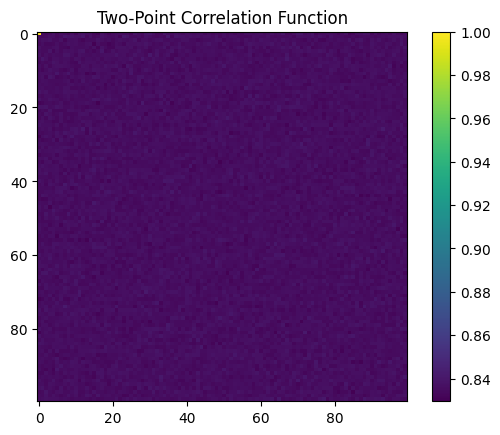

In [21]:
def plot_correlation(correlation,title='Two-Point Correlation Function'):
  plt.imshow(correlation, cmap='viridis')
  plt.title(title)
  plt.colorbar()
  plt.show()

if __name__ == "__main__":
  image = np.random.randint(1,5, size=(100,100))
  correlation = calculate_two_point_correlation(image)
  plot_correlation(correlation)

In [47]:
from skimage import io, filters
image = io.imread('Capture.PNG')
thresh = filters.threshold_otsu(image)
binary = (image > thresh).astype(np.float32)

<ipython-input-47-2528110b0190>:3: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (258, 260, 4) looks like that of an RGB image.
  thresh = filters.threshold_otsu(image)


In [48]:
def two_point_direct(binary,r_max):
  height, width = binary.shape
  S2 = np.zeros(r_max)
  counts = np.zeros(r_max)
  phi = np.mean(binary)

  for i in range(height):
    for j in range(width):
      if binary[i,j] ==1:
        for di in range(-r_max, r_max+1):
          for dj in range(-r_max,r_max+1):
            r = int(np.hypot(di,dj))
            if 0< r< r_max:
              i2 = (i+di)
              j2 = (j+dj)
              if binary[i2,j2] ==1:
                SR[r] += 1
                counts[r] +=1
  return S2 / (counts*phi**2+1e-12)

In [51]:
def radial_average(S2):
  L = S2.shape[0]
  y,x = np.indices((L,L)) - L//2
  r = np.sqrt(x**2+y**2).astype(int)
  r_flat = r.ravel()
  S2_flat = S2.ravel()

  r_bins = np.arange(0,np.max(r)+1)
  radial_sum = np.bincount(r_flat,weights=S2_flat,
                           minlength = len(r_bins))
  counts = np.bincount(r_flat,minlength = len(r_bins))
  return radial_sum/ (count+1e-12)

In [52]:
S2 = calculate_two_point_correlation(binary)
r = np.arange(S2.shape[0]//2)
S2_radial = radial_average(S2)[:len(r)]


plt.plot(r, S2_radial)
plt.xlabel('Radial Distance (pixels)')
plt.ylabel('S2(r)')
plt.title('Two Point Correlation Function')
plt.grid(True)
plt.show()

ValueError: The weights and list don't have the same length.